## Optimizing Customer Engagement through RFM Segmentation and Analysis
### Data Cleaning Notebook
This notebook will focus on preparing our raw data for analysis by cleaning, transforming, and preprocessing it.
Here's a summary of the steps that will be taken in this data cleaning notebook:
1. Handle Missing Values
2. Identify Outliers
3. Address Inconsistencies
4. Created new features

The dataset used is downloaded from [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Data Cleaning and Preprocessing

##### Step 1: Handle Missing Values

In [4]:
#Checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
##### Step 1: Identify Outliers in Income

# Statistical summary of the Income column
income_summary = df['Income'].describe()
print(income_summary)

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


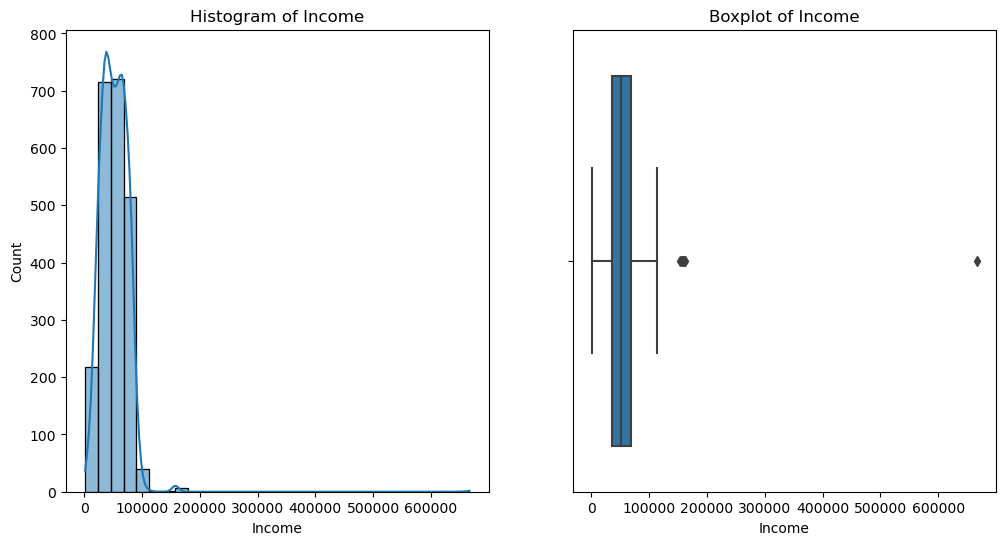

In [6]:
# Histogram to visualize the distribution of Income
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Histogram of Income')

# Box plot to visualize the outliers in Income
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')

plt.show()

In [7]:
# Calculate the IQR for Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Lower bound for outliers: -14525.5
Upper bound for outliers: 118350.5


In [8]:
# Extract rows with outliers
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Print all columns for the outliers
outliers[['ID', 'Income', 'Education', 'Marital_Status']]

,ID,Income,Education,Marital_Status
164,8475,157243.0,PhD,Married
617,1503,162397.0,PhD,Together
655,5555,153924.0,Graduation,Divorced
687,1501,160803.0,PhD,Married
1300,5336,157733.0,Master,Together
1653,4931,157146.0,Graduation,Together
2132,11181,156924.0,PhD,Married
2233,9432,666666.0,Graduation,Together


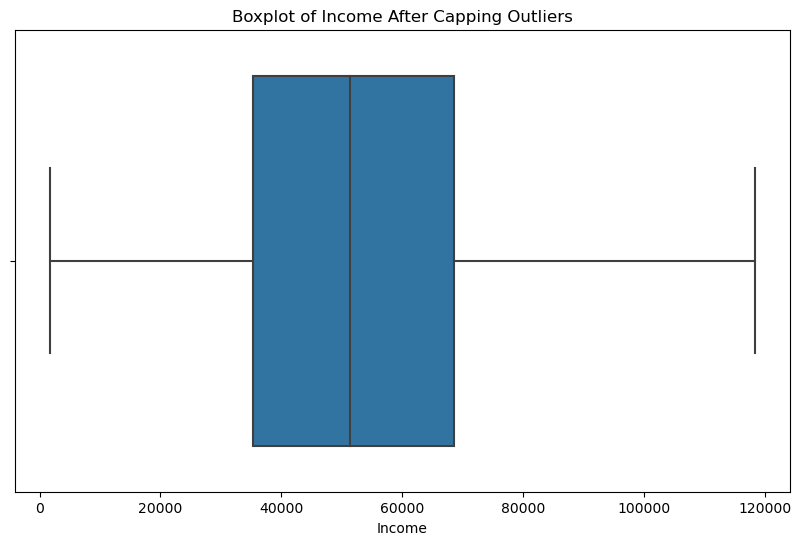

In [9]:
# Cap the outliers
df['Income'] = df['Income'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Verify the capping by plotting the boxplot again
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income After Capping Outliers')
plt.show()

In [10]:
# Fill missing values in Income with the mean.
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [11]:
# Verify the filling of for missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

__Summary of Findings and Decisions__

* We check for missing values in income and identify outliers using statistical summaries, visualizations (histograms & boxplots), and IQR.
* We explore outlier characteristics (e.g., education level) to understand potential reasons for high income.
* To reduce the influence of extreme values, we cap outliers by replacing them with defined boundaries based on the IQR.
* We verify that capping successfully reduced the impact of outliers using another boxplot.
* Finally, we fill the missing values in Income column with its mean, and verify using the isna().sum()

##### Step 2: Address Inconsistencies

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [14]:
# Convert date columns to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Derive age from Year_Birth
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']

# Calculate Frequency and Monetary value for each customer
# Frequency: Total number of purchases made by each customer
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Monetary value: Total amount spent by each customer on different product categories
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Verify the new columns
print(df[['Frequency', 'Monetary']].head())


   Frequency  Monetary
0         25      1617
1          6        27
2         21       776
3          8        53
4         19       422


In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Frequency,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,67,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,70,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,59,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,40,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,43,19,422


Above we did the following; 
* Converted dates to a consistent format (datetime)
* Calculated customer age based on year of birth
* Created new features:
     * Frequency: Total number of purchases per customer
     * Monetary value: Total spent per customer across categories

We will drop the columns we won't need, save our dataset to csv for later use

In [16]:
# Define the columns to keep based on the objectives
columns_to_keep = ['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 
                   'Recency', 'Complain', 'Frequency', 'Monetary', 'NumWebVisitsMonth', 
                   'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Select the columns to keep
df_cleaned = df[columns_to_keep]

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_ecommerce_data.csv', index=False)

# Confirm the columns in the cleaned dataset
print("Columns in the cleaned dataset:\n", df_cleaned.columns)


Columns in the cleaned dataset:
 Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'Frequency',
       'Monetary', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
      dtype='object')


#### Summary of what was done 

1. __Handle Missing Values:__

* Checked for missing values using the isnull().sum() method.
* Found missing values in the 'Income' column.
* Handled missing values in the 'Income' column by filling them with the mean value.

2. __Identify Outliers:__

* Used statistical summaries, histograms, and boxplots to identify outliers in the 'Income' column.
* Calculated the Interquartile Range (IQR) to define outlier boundaries.
* Extracted rows with outliers and examined their characteristics, such as education level and marital status.
* Capped outliers by replacing them with defined boundaries based on the IQR.
* Verified that capping successfully reduced the impact of outliers using another boxplot.

3. __Address Inconsistencies:__

* Converted date columns to a consistent datetime format.
* Derived customer age from the 'Year_Birth' column.

4. __Created new features:__
* Frequency: Total number of purchases per customer.
* Monetary: Total spent per customer across different product categories.
* Selected the columns to keep based on project objectives.

Saved the cleaned dataset to a new CSV file.